In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

A railroad numbers its locomotives in order 1..N. One day you see a locomotive with the number 60. Estimate how many locomotives the railroad has.

In [83]:
data = 60, 30, 90,
steps = 500, 1000, 2000,
result = {}

for s in steps:
    hypos = np.arange(1, s+1, 1)
    # init_prior = np.ones(hypos.shape) / hypos.shape[0]  # uniform
    init_prior = hypos**(-1.0)  # power law
    prior = init_prior.copy()
    for d in data:
        likelihood = 1 / hypos
        likelihood[d>hypos] = 0  # data
        posterior = prior * likelihood
        prior = posterior
    posterior /= posterior.sum()

    result[s] = (posterior * hypos).sum()

133.99746308073125


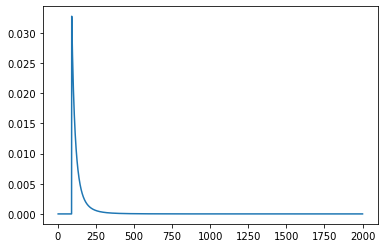

In [88]:
result
plt.plot(hypos, posterior, label='uniform prior')
# plt.plot(hypos, init_prior)
print((hypos * posterior).sum())

Suppose you are giving a talk in a large lecture hall and the fire marshal interrupts because they think the audience exceeds 1200 people, which is the safe capacity of the room.

You think there are fewer then 1200 people, and you offer to prove it. It would take too long to count, so you try an experiment:

You ask how many people were born on May 11 and two people raise their hands.

You ask how many were born on May 23 and 1 person raises their hand.

Finally, you ask how many were born on August 1, and no one raises their hand.

How many people are in the audience? What is the probability that there are more than 1200 people.

mean = 486
P[N>1200] = 1.16%


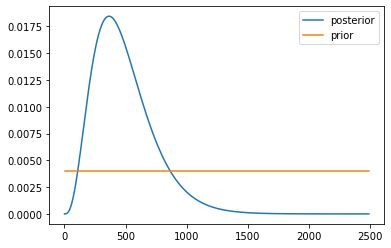

In [40]:
from scipy.stats import binom

hypos = np.arange(1, 2500, 10)
init_prior = np.ones(hypos.shape) / hypos.shape[0]
prior = init_prior.copy()

data = [2, 1, 0]
for d in data:
    likelihood = binom.pmf(k=d, n=hypos, p=1/365)
    posterior = prior * likelihood
    prior = posterior
posterior /= posterior.sum()

plt.plot(hypos, posterior, label='posterior')
plt.plot(hypos, init_prior, label='prior')
plt.legend()
print('mean = %.f' % (hypos * posterior).sum())
print('P[N>1200] = %.2f%%' % (posterior[hypos>=1200].sum()*100))

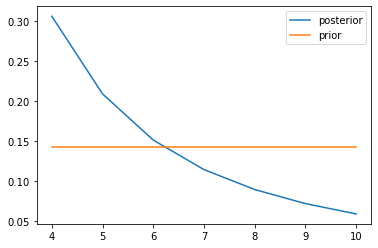

In [61]:
"""
data: 3 days saw 2 same rabbit and 1 different rabbit
prior: uniform 4-10
"""

from scipy.stats import binom

hypos = np.arange(4, 11, 1)
prior = np.ones(hypos.shape) / hypos.shape[0]
likelihood = binom.pmf(k=2, n=3, p=1/hypos)
posterior = prior * likelihood
posterior /= posterior.sum()

plt.plot(hypos, posterior, label='posterior')
plt.plot(hypos, prior, label='prior')
plt.legend()

Come from family >1 child = 90.52%


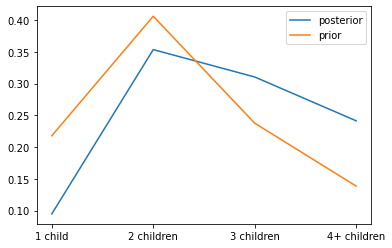

In [74]:
"""
prior: given
likelihood: each cohort is proportionally more likely to be picked based on the # of children
"""

from scipy.stats import binom

hypos = ['1 child', '2 children', '3 children', '4+ children']
prior = np.array([22., 41., 24., 14.])
prior /= prior.sum()
likelihood = np.array([1., 2., 3., 4.])
posterior = prior * likelihood
posterior /= posterior.sum()

plt.plot(hypos, posterior, label='posterior')
plt.plot(hypos, prior, label='prior')
plt.legend()
print('Come from family >1 child = %.2f%%' % ((1-posterior[0])*100))